# Basic Usage Guide for Obstacle Tower Gym Interface

In [1]:
from obstacle_tower_env import ObstacleTowerEnv
%matplotlib inline
from matplotlib import pyplot as plt

## Launching the environment
Ensure that the Obstacle Tower binary has been downloaded (https://github.com/Unity-Technologies/obstacle-tower-env#download-the-environment), and placed in the correct sub-folder. Here we use the `examples/ObstacleTower` sub-folder.

In [2]:
# Realtime mode determines whether the environment window will render the scene,
# as well as whether the environment will run at realtime speed. Set this to `True`
# to visual the agent behavior as you would in player mode.

env = ObstacleTowerEnv('./ObstacleTower/obstacletower', retro=False, realtime_mode=False)

INFO:mlagents_envs:
'ObstacleTower-v2.0' started successfully!
Unity Academy name: ObstacleTower-v2.0
        Number of Brains: 1
        Number of Training Brains : 1
        Reset Parameters :
		allowed-floors -> 2.0
		allowed-modules -> 2.0
		lighting-type -> 1.0
		starting-floor -> 0.0
		visual-theme -> 1.0
		allowed-rooms -> 2.0
		dense-reward -> 1.0
		total-floors -> 100.0
		agent-perspective -> 1.0
		tower-seed -> -1.0
		default-theme -> 0.0
Unity brain name: LearningBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): [3, 3, 2, 3]
        Vector Action descriptions: Movement Forward/Back, Camera, Jump, Movement Left/Right
INFO:gym_unity:1 agents within environment.


In [3]:
# The environment provided has a MultiDiscrete action space, where the 4 dimensions are:

# 0. Movement (No-Op/Forward/Back)
# 1. Camera Rotation (No-Op/Counter-Clockwise/Clockwise)
# 2. Jump (No-Op/Jump)
# 3. Movement (No-Op/Right/Left)

env.action_space

MultiDiscrete([3 3 2 3])

In [4]:
# The observation space provided includes a 168x168 image (the camera from the simulation)
# as well as the number of keys held by the agent (0-5) and the amount of time remaining.

env.observation_space

Tuple(Box(168, 168, 3), Discrete(5), Box(1,))

## Interacting with the environment

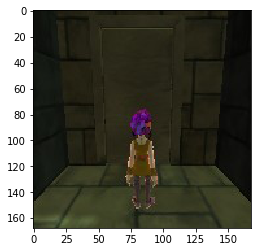

In [5]:
obs = env.reset()
plt.imshow(obs[0])

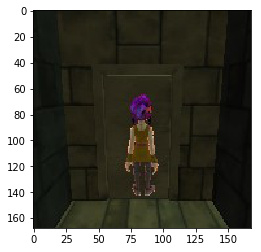

In [6]:
obs, reward, done, info = env.step(env.action_space.sample())
plt.imshow(obs[0])

## Setting environment parameters
We can also set the random seed used to generate the environment, as well as choose a starting floor.

In [7]:
# Seeds can be chosen from range of 0-100.
env.seed(5)

In [8]:
# Floors can be chosen from range of 0-100.
env.floor(15)

In [9]:
# Additional reset parameters can be set using a config dictionary
# Here we set the agent perspective to first-person mode.
config = {'agent-perspective': 0}

INFO:mlagents_envs:Academy reset with parameters: agent-perspective -> 0, starting-floor -> 15, tower-seed -> 5


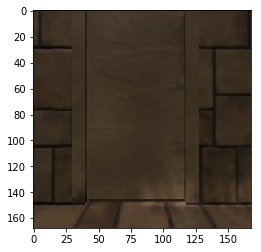

In [10]:
# These parameters won't take place until the next reset.
obs = env.reset(config=config)
plt.imshow(obs[0])

## Closing the environment

In [11]:
env.close()

## Launching the environment (retro mode)
We also provide a `retro mode` which uses observation and action spaces similar to those found in the Arcade Learning Environment (ALE).

In [12]:
env = ObstacleTowerEnv('./ObstacleTower/obstacletower', retro=True)

INFO:mlagents_envs:
'ObstacleTower-v2.0' started successfully!
Unity Academy name: ObstacleTower-v2.0
        Number of Brains: 1
        Number of Training Brains : 1
        Reset Parameters :
		allowed-rooms -> 2.0
		dense-reward -> 1.0
		total-floors -> 100.0
		agent-perspective -> 1.0
		tower-seed -> -1.0
		default-theme -> 0.0
		allowed-floors -> 2.0
		allowed-modules -> 2.0
		lighting-type -> 1.0
		starting-floor -> 0.0
		visual-theme -> 1.0
Unity brain name: LearningBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): [3, 3, 2, 3]
        Vector Action descriptions: Movement Forward/Back, Camera, Jump, Movement Left/Right
INFO:gym_unity:1 agents within environment.


In [13]:
# In retro mode, the observation is an 84x84 image with the time remaining and key count visually embedded.
env.observation_space

Box(84, 84, 3)

## Interacting with the environment (retro mode)

In [14]:
obs = env.reset()
print(obs.shape)

(84, 84, 3)


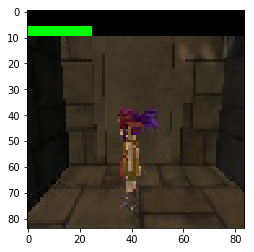

In [15]:
obs, reward, done, info = env.step(env.action_space.sample())
plt.imshow(obs)

## Closing the environment

In [16]:
env.close()